In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [104]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import transforms
from torchvision import datasets
from torch.utils.data.sampler import SubsetRandomSampler
from utils import calculate_normalisation_params

from resnet import ResNet
from data_loader import get_data_loaders
from train_evaluate import train,evaluate

import warnings
warnings.filterwarnings('ignore')

# Getting the train_loader and the test_loader

In [47]:
data_dir = 'data/cifar10'
batch_size = 128
train_transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomCrop(32),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    # For testing, we only evaluate the single 
    # view of the original 32×32 image.
    transforms.ToTensor()
])
train_loader,test_loader = get_data_loaders(data_dir,batch_size,train_transform,test_transform)

Files already downloaded and verified
Files already downloaded and verified


truck


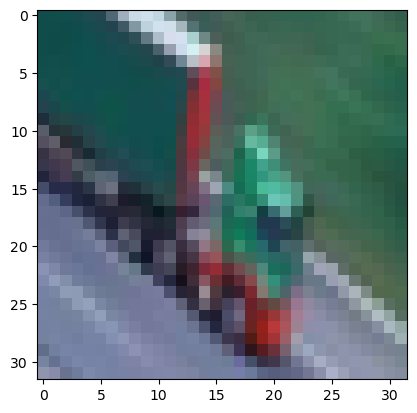

In [48]:

plt.imshow(train_loader.dataset.data[50])
print(train_loader.dataset.classes[train_loader.dataset.targets[50]])

# Normalizing the images

In [ ]:
train_transform = transforms.Compose([
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.ToTensor()
])

train_loader, test_loader = get_data_loaders(data_dir,
                                             batch_size,
                                             train_transform,
                                             test_transform,
                                             shuffle=True,
                                             num_workers=4,
                                             pin_memory=True)


# Takes a while to run so I've hardcoded results below

means, stds = calculate_normalisation_params(train_loader, test_loader)
print(f'means: {means}')
print(f'stds: {stds}')

In [54]:
means = [0.4918687901200927, 0.49185976472299225, 0.4918583862227116]
stds = [0.24697121702736, 0.24696766978537033, 0.2469719877121087]

normalize = transforms.Normalize(
    mean=means,
    std=stds,
)

data_dir = 'data/cifar10'
batch_size = 128

train_transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomCrop(32),
    transforms.ToTensor(),
    normalize
])

test_transform = transforms.Compose([
    # For testing, we only evaluate the single 
    # view of the original 32×32 image.
    transforms.ToTensor(),
    normalize
])

train_loader,test_loader = get_data_loaders(data_dir,batch_size,train_transform,test_transform)

Files already downloaded and verified
Files already downloaded and verified


Finding the number of iterations per epoch

In [56]:
print("Iterations per epoch: ", len(train_loader))

Iterations per epoch:  391


In [58]:
epochs = 164
lr = 0.1
momentum = 0.9
weight_decay = 0.0001 

milestones = [82, 123]
# Multiplying learning rate by gamma at each milestone
gamma = 0.1

In [ ]:
ns = [3, 5, 7, 9]

for n in ns:
    print(f'MODEL SIZE: n={n}')
    train_loader, test_loader = get_data_loaders(data_dir,
                                                 batch_size,
                                                 train_transform,
                                                 test_transform,
                                                 shuffle=True,
                                                 num_workers=4,
                                                 pin_memory=True)
    
    model = ResNet(n, shortcuts=False)
    criterion = torch.nn.NLLLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=weight_decay)
    results_file = f'results/plainnet{6*n+2}.csv'
    model_file = f'pretrained/plainnet{6*n+2}.pt'
    train(model, epochs, train_loader, test_loader, criterion, 
          optimizer, results_file, MODEL_PATH=model_file)

MODEL SIZE: n=3
Files already downloaded and verified
Files already downloaded and verified
Epoch 	Batch 	NLLLoss_Train
